In [8]:
import pandas as pd
import matplotlib.pyplot as plt


# Read the CSV file
data = pd.read_csv('./AAPL.csv')


# date_header = "timestamp"
# for col in data.columns:
#     if (col != date_header):
#         data[col] = data[col].pct_change()

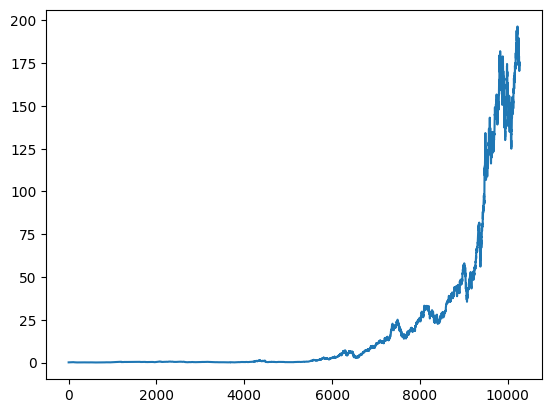

In [9]:

plt.plot(data['Close'])
plt.show()

In [4]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

data_path = "../results/AAPL_336_96_PatchTST_custom_ftM_sl336_ll48_pl96_dm128_nh16_el3_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0/data/"

# get npy file for pred and true
true = np.load(data_path + "true.npy")
pred = np.load(data_path + "pred.npy")


image_path = data_path + "images/"

# remove dir before creating
if os.path.exists(image_path):
    os.system("rm -rf " + image_path)
os.makedirs(image_path)

# Loop through each index
for index in range(0, int(len(true) * 0.1), 10):
    true_data = true[index, :, 4] + 1
    pred_data = pred[index, :, 4] + 1

    true_data = np.insert(true_data, 0, 1, axis=0)
    pred_data = np.insert(pred_data, 0, 1, axis=0)

    plt.figure()

    # Plot the true and predicted values for the current index
    plt.plot(true_data.cumprod())
    plt.plot(pred_data.cumprod())

    # Save the figure as an image
    plt.savefig(image_path + f'index_{index}.png')

    # Close the figure
    plt.close()

# Create a list to store the images
images = []

# Loop through each index and open the corresponding image
for index in range(0, int(len(true) * 0.1), 10):
    image = Image.open(image_path + f'index_{index}.png')
    images.append(image)

# Save the images as a GIF
images[0].save(data_path + 'output.gif', save_all=True,
               append_images=images[1:], optimize=False, duration=200, loop=0)

if os.path.exists(image_path):
    os.system("rm -rf " + image_path)

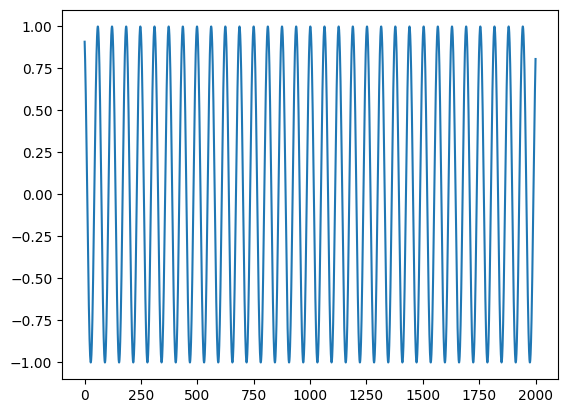

/var/tmp/ipykernel_14135/1554898606.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start='1/1/2020', periods=6757, freq='H')


In [3]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# values for sin waves
x = np.linspace(0, 2000, 6757)
y1 = np.sin(x * 0.1 + 2)
y2 = np.sin(x * 0.1 + 3)
y3 = np.sin(x * 0.1 + 5)
y4 = np.sin(x * 0.1 + 12)
y5 = (np.random.rand(6757) * 40000000 + 100000000).astype(int)

plt.plot(x, y1)
plt.show()

# create timestamps
timestamps = pd.date_range(start='1/1/2020', periods=6757, freq='H')

# create a dataframe
data = pd.DataFrame({'timestamp': timestamps, 'Close': y1,
                    'High': y2, 'Low': y3, 'Open': y4, 'Volume': y5})

# save the dataframe to a CSV file
data.to_csv('sin_wave.csv', index=False)